In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np

In [4]:
#creating a pandas series from an array
s1 = pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
s2 = pd.Series(np.array(['A','B','C']))
s3 = pd.Series(np.zeros((5), dtype=int), index=['z1','z2','z3','z4','z5'])

print(s1)
print(s2)
print(s3)

a    0.049806
b   -0.906361
c    0.746625
d    1.205136
e    0.156323
dtype: float64
0    A
1    B
2    C
dtype: object
z1    0
z2    0
z3    0
z4    0
z5    0
dtype: int64


In [8]:
#Creating a pandas series from a dictionary
s4 = pd.Series({'a':1,'b':2,'c':3})
print(s4)

a    1
b    2
c    3
dtype: int64


In [9]:
#Creating a pandas series from a scalar
s5 = pd.Series(5.,index=[2,4,6,8,10])
print(s5)

2     5.0
4     5.0
6     5.0
8     5.0
10    5.0
dtype: float64


In [11]:
#Slicing a series
s = pd.Series(np.random.randn(5),index=['a','b','c','d','e'])
print(s)

print('s[0]')
print(s[0])

print('s[:3]')
print(s[:3])

print('s[s > s.median()]')
print(s[s > s.median()])

print('s[[4,3,1]]')
print(s[[4,3,1]])

a    0.320786
b    0.236929
c   -0.981534
d    1.684452
e   -1.764554
dtype: float64
s[0]
0.32078631222611537
s[:3]
a    0.320786
b    0.236929
c   -0.981534
dtype: float64
s[s > s.median()]
a    0.320786
d    1.684452
dtype: float64
s[[4,3,1]]
e   -1.764554
d    1.684452
b    0.236929
dtype: float64


In [13]:
#Find the data type of a Series
s1.dtype

dtype('float64')

In [19]:
#Return the array from which the series was built
arr = s2.array
print(arr,'\n')

arr2 = s2.to_numpy()
print(arr2)

<PandasArray>
['A', 'B', 'C']
Length: 3, dtype: object 

['A' 'B' 'C']


In [21]:
#Accessing elements by index labels
print(s,'\n')
print(s['a'],'\n')
s['e']  = 12.
print(s['e'])

a    0.320786
b    0.236929
c   -0.981534
d    1.684452
e   -1.764554
dtype: float64 

0.32078631222611537 

12.0


In [24]:
#Checking for membership of index
print('e' in s)
print('f' in s)

True
False


In [25]:
#Checking for membership by accessing
s['f'] #raises exception

KeyError: 'f'

In [29]:
#Checking for membership by accessing
s.get('f') #returns None

s.get('f', np.nan) #returns nan

nan

In [32]:
#Performing operations of each element of Series
s = s + s
print(s,'\n')

s = s*2
print(s,'\n')

s = np.exp(s)
print(s)

a    7.215940e+00
b    5.159618e+00
c    3.943938e-02
d    1.687416e+03
e    1.403347e+21
dtype: float64 

a    1.443188e+01
b    1.031924e+01
c    7.887876e-02
d    3.374831e+03
e    2.806694e+21
dtype: float64 

a    1.852190e+06
b    3.031010e+04
c    1.082073e+00
d             inf
e             inf
dtype: float64


In [39]:
#Performing operations between series with or without the same labels
a = pd.Series({'a':1,'b':2,'c':3})
b = pd.Series({'a':5.,'c':3,'d':6})
print(a,'\n')
print(b,'\n')

#Returns the union of indexes but only the intersection will have meaningful values
print(a + b)

a    1
b    2
c    3
dtype: int64 

a    5.0
c    3.0
d    6.0
dtype: float64 

a    6.0
b    NaN
c    6.0
d    NaN
dtype: float64


In [42]:
#Drop labels with missing (na) values
c = a + b

c.dropna()

a    6.0
c    6.0
dtype: float64

In [43]:
#Naming a Series
s = pd.Series(np.random.randn(5), name='Cubs')
s

0    0.340167
1    0.476677
2   -0.237853
3    0.691452
4   -0.380118
Name: Cubs, dtype: float64

In [48]:
#Renaming a Series
s2 = s.rename('cubbies') #A different object than s
s2.name

'cubbies'

In [62]:
#Creating a DataFrame
d = {'one': pd.Series([1.,2.,3.], index=['a','b','c']),
     'two': pd.Series([1.,2.,3.,4.], index=['a','b','c','d'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [63]:
#Discards data from the Series that is not included in the index arg
pd.DataFrame(d, index=['d','b','d'])

,one,two
d,NaN,4.0
b,2.0,2.0
d,NaN,4.0


In [64]:
#Only returns the indices and columns specified
pd.DataFrame(d,index=['d','b','a'],columns=['two','three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [66]:
#Check the index
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [68]:
#Check the column labels
df.columns

Index(['one', 'two'], dtype='object')

In [69]:
#Creating a DataFrame from an array or list
df = pd.DataFrame({'a':[1,2,3,4],'b':[4,3,2,1]})
df

,a,b
0,1,4
1,2,3
2,3,2
3,4,1


In [70]:
df = pd.DataFrame({'a':[1,2,3,4],'b':[4,3,2,1]},index=['a','b','c','d'])
df

,a,b
a,1,4
b,2,3
c,3,2
d,4,1


In [78]:
#Creating a DataFrame from a structured or record Array
data = np.zeros((2,), dtype=[('A','i4'),('B','f4'),('C','a10')])
data[:] = [(1,2.,'Hello'),(2,3.,'World')]

pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [80]:
pd.DataFrame(data, index=['first','second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [81]:
pd.DataFrame(data,columns=['C','A','B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [83]:
#Creating a DataFrame from a list of dicts
data2 = [{'a':1,'b':2},{'a':5,'b':10,'c':20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [84]:
pd.DataFrame(data2, index=['first','second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [85]:
pd.DataFrame(data2,columns=['a','b'])

,a,b
0,1,2
1,5,10


In [88]:
#Creating a DataFrame from a structured array using a field as the index
pd.DataFrame.from_records(data,index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [91]:
#Column selection
df['a']

a    1
b    2
c    3
d    4
Name: a, dtype: int64

In [100]:
#Adding columns
df['c'] = df['a']*df['b']
df

,a,b,flag,c
a,1,4,False,4
b,2,3,False,6
c,3,2,True,6
d,4,1,True,4


In [98]:
df['flag'] = df['a'] > 2
df

,a,b,flag
a,1,4,False
b,2,3,False
c,3,2,True
d,4,1,True


In [101]:
#Deleting a column
del df['c']
df

,a,b,flag
a,1,4,False
b,2,3,False
c,3,2,True
d,4,1,True


In [102]:
flagCol = df.pop('flag')
flagCol

a    False
b    False
c     True
d     True
Name: flag, dtype: bool

In [103]:
df

,a,b
a,1,4
b,2,3
c,3,2
d,4,1


In [105]:
#Inserting a scalar value
df['foo'] = 'one for all'
df

,a,b,foo
a,1,4,one for all
b,2,3,one for all
c,3,2,one for all
d,4,1,one for all


In [111]:
#Subsetting DataFrame: 1st [] column label, 2nd index labels
df[:][:2]

,a,b,foo
a,1,4,one for all
b,2,3,one for all


In [113]:
#Inserting a Series that does not have all indexes (or values for all rows)
df['a_'] = df['a'][:2]
df

,a,b,foo,a_
a,1,4,one for all,1.0
b,2,3,one for all,2.0
c,3,2,one for all,NaN
d,4,1,one for all,NaN


In [115]:
#Insert column at a specific location
df.insert(1,'bar',df['a_'])
df

ValueError: cannot insert bar, already exists

In [129]:
#Creating a new column with assign() 
df = pd.DataFrame(np.random.randn(10,4),
                  index=['a','b','c','d','e','f','g','h','i','j'],
                  columns=['A','B','C','D'])
(df.assign(new_col=df['A']/df['B']).head()) #note that for the new column to persist there needs to be an assignment operation df = (df.assign()) 

,A,B,C,D,new_col
a,-0.604356,-0.290326,0.519261,0.392831,2.081647
b,0.179648,-0.302655,1.106147,0.387260,-0.593571
c,0.783573,-0.288435,-0.303522,-0.437195,-2.716639
d,1.021917,0.962132,1.017055,-1.219885,1.062138
e,-0.402448,1.481066,0.896112,0.169538,-0.271729


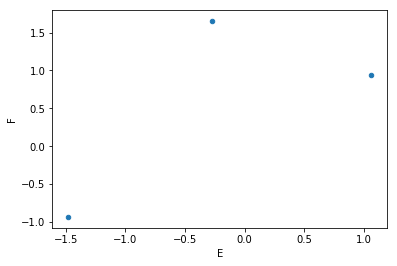

In [137]:
#Useful when chaining operations
df.query('B > 0.5').assign(E = lambda x: x['A']/x['B'],
                          F = lambda x: x.B/x.C).plot(kind='scatter', x='E', y='F')

In [143]:
#DataFrame alignment and arithmetics works as a Union operation
df2 = df[['A','B']][5:]
df2 + df

,A,B,C,D
a,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN
f,-0.063238,0.583251,NaN,NaN
g,-1.903487,1.289369,NaN,NaN
h,-0.565022,-2.006461,NaN,NaN
i,-0.844851,-3.772793,NaN,NaN
j,-1.895459,-3.137526,NaN,NaN


In [145]:
#Operations with scalars
df2 * 5+ 2

,A,B
f,1.841904,3.458128
g,-2.758716,5.223423
h,0.587444,-3.016152
i,-0.112127,-7.431984
j,-2.738647,-5.843816


In [149]:
1/df2

,A,B
f,-31.626386,3.429055
g,-1.050703,1.551146
h,-3.539683,-0.996780
i,-2.367282,-0.530111
j,-1.055153,-0.637445


In [151]:
#Boolean operations
df1 = pd.DataFrame({'a':[1,0,1], 'b':[0,1,1]}, dtype=bool)
df2 = pd.DataFrame({'a':[0,1,1], 'b':[1,1,0]}, dtype=bool)

df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [152]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [153]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [154]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [162]:
#Transposing
df[:5].T


,a,b,c,d,e
A,-0.604356,0.179648,0.783573,1.021917,-0.402448
B,-0.290326,-0.302655,-0.288435,0.962132,1.481066
C,0.519261,1.106147,-0.303522,1.017055,0.896112
D,0.392831,0.387260,-0.437195,-1.219885,0.169538


In [159]:
#Applying numpy functions
np.exp(df)

,A,B,C,D
a,0.546426,0.748020,1.680786,1.481169
b,1.196795,0.738854,3.022689,1.472940
c,2.189282,0.749436,0.738213,0.645845
d,2.778517,2.617271,2.765039,0.295264
e,0.668681,4.397633,2.450059,1.184757
f,0.968875,1.338602,0.859469,0.194891
g,0.386067,1.905386,0.502091,1.534099
h,0.753888,0.366693,25.699632,0.663004
i,0.655455,0.151617,5.696136,1.619890
j,0.387620,0.208303,2.116836,0.472882


In [163]:
#Console display. Returning a summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
A    10 non-null float64
B    10 non-null float64
C    10 non-null float64
D    10 non-null float64
dtypes: float64(4)
memory usage: 720.0+ bytes
